# Imports

In [74]:
import tabula
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import calendar
import xarray as xr
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
import plotly.express as px
from sklearn.linear_model import LinearRegression,Lasso
from typing import Optional
import seaborn as sns
from math import pi
import plotly.graph_objects as go
import plotly.io as pio
import datetime as dt
from numpy import array

# DataFrame

In [47]:
dailydata=xr.open_dataset(r'C:\Users\Harshit Jain\Desktop\delhiaq\daily_data.nc')
df=dailydata.to_dataframe()

df.columns = df.columns.str.lower()
df.rename(columns={'Date':'date','pm2.5':'pm25','ozone':'o3','tot-rf':'totrf'}, inplace=True)
df = df[df['station'] == 'Wazirpur, Delhi - DPCC'] 

print(df)


                      station       date   latitude  longitude        pm25  \
index                                                                        
13376  Wazirpur, Delhi - DPCC 2022-01-01  28.699793  77.165453  287.269231   
13377  Wazirpur, Delhi - DPCC 2022-01-02  28.699793  77.165453  307.791667   
13378  Wazirpur, Delhi - DPCC 2022-01-03  28.699793  77.165453  310.250000   
13379  Wazirpur, Delhi - DPCC 2022-01-04  28.699793  77.165453  301.187500   
13380  Wazirpur, Delhi - DPCC 2022-01-05  28.699793  77.165453  317.885417   
...                       ...        ...        ...        ...         ...   
13736  Wazirpur, Delhi - DPCC 2022-12-27  28.699793  77.165453  232.427083   
13737  Wazirpur, Delhi - DPCC 2022-12-28  28.699793  77.165453  182.781250   
13738  Wazirpur, Delhi - DPCC 2022-12-29  28.699793  77.165453  256.239583   
13739  Wazirpur, Delhi - DPCC 2022-12-30  28.699793  77.165453  325.378333   
13740  Wazirpur, Delhi - DPCC 2022-12-31  28.699793  77.165453  

# select_by

Utility function to cut a given dataframe by year and find the average value
of each day, month, or year. Optionally, data can be grouped by specified columns.

  
Parameters
----------
    df: data frame
        A data frame containing a date field and optional grouping columns.
    year: type string
        A year to select and filter the data.
    group: list, optional
        A list of columns to group the data by. Default is None (no grouping).
    time_period: {'day', 'month', 'year'}, optional
        The time period to compute the average value. Default is 'day'.
    
Returns
-------
    data frame
        A data frame with the average value of each day, month, or year.
        If group is specified, the data will be grouped accordingly.
 

In [50]:
def select_by(df:pd.DataFrame, year:str, group:Optional=None, time_period:str='day'):
   
    
    df['date'] = pd.to_datetime(df['date'])
    df_year = df[df['date'].dt.year == int(year)]
    
    if group:
        df_grouped = df_year.groupby(group).resample(time_period[0], on='date').mean(numeric_only=True)
        return df_grouped
    
    if time_period == 'month':
        df_month = df_year.resample('M', on='date').mean(numeric_only=True)
        return df_month
    elif time_period == 'year':
        df_yearly = df_year.resample('Y', on='date').mean(numeric_only=True)
        return df_yearly
    
    df_day = df_year.resample('D', on='date').mean(numeric_only=True)
    return df_day






select_by(df,'2022',group=['station'], time_period='day')

#perfect

latitude  longitude        pm25  \
station                date                                           
Wazirpur, Delhi - DPCC 2022-01-01  28.699793  77.165453  287.269231   
                       2022-01-02  28.699793  77.165453  307.791667   
                       2022-01-03  28.699793  77.165453  310.250000   
                       2022-01-04  28.699793  77.165453  301.187500   
                       2022-01-05  28.699793  77.165453  317.885417   
...                                      ...        ...         ...   
                       2022-12-27  28.699793  77.165453  232.427083   
                       2022-12-28  28.699793  77.165453  182.781250   
                       2022-12-29  28.699793  77.165453  256.239583   
                       2022-12-30  28.699793  77.165453  325.378333   
                       2022-12-31  28.699793  77.165453  184.802083   

                                         pm10          no        no2  \
station                date                                            
Wazirpur, Delhi - DPCC 2022-01-01  475.480769  118.381538  51.310000   
                       2022-01-02  453.968750   96.006250  50.190000   
                       2022-01-03  479.833333   91.113750  53.621250   
                       2022-01-04  493.656250  106.824583  50.361250   
                       2022-01-05  407.291667   73.938750  37.500417   
...                                       ...         ...        ...   
                       2022-12-27  337.281250   27.374286  32.412857   
                       2022-12-28  305.708333   35.060833  45.533333   
                       2022-12-29  434.375000   42.680909  53.866364   
                       2022-12-30  509.857500   57.443750  45.899583   
                       2022-12-31  282.937500   22.763750  27.212083   

                                          nox         nh3       so2        co  \
station                date                                                     
Wazirpur, Delhi - DPCC 2022-01-01  169.046923   86.561538  5.034615  2.873077   
                       2022-01-02  145.770000   88.219583  4.236250  1.766667   
                       2022-01-03  144.687917   85.740000  4.885833  2.056522   
                       2022-01-04  157.067917   84.649167  4.950417  2.019565   
                       2022-01-05  111.499167   89.224167  4.217917  1.558333   
...                                       ...         ...       ...       ...   
                       2022-12-27   59.823810   85.049583  4.441250  2.527500   
                       2022-12-28   80.560833   89.303750  4.491250  2.915000   
                       2022-12-29   96.632727   94.910833  5.825833  3.572105   
                       2022-12-30  103.370000  109.907500  5.055417  3.347500   
                       2022-12-31   49.961667   99.947500  3.724167  0.940417   

                                   ...   benzene   toluene         rh  \
station                date        ...                                  
Wazirpur, Delhi - DPCC 2022-01-01  ...  2.760769  5.623077  63.996154   
                       2022-01-02  ...  3.176250  5.516667  71.042083   
                       2022-01-03  ...  2.984167  5.445833  69.082917   
                       2022-01-04  ...  3.410476  5.166250  63.296667   
                       2022-01-05  ...  3.643333  4.630417  82.289583   
...                                ...       ...       ...        ...   
                       2022-12-27  ...       NaN       NaN  78.898750   
                       2022-12-28  ...  0.000000  0.000000  67.965833   
                       2022-12-29  ...  0.000000  0.000000  63.645000   
                       2022-12-30  ...  0.000000  0.000000  70.535000   
                       2022-12-31  ...  0.000000  0.000000  77.682917   

                                         ws          wd          sr  \
station                date                                           
Wazirpur, Delhi - DPCC 2022-0

# calendar_plot

Shows daily concentrations laid out in a calendar format.
Plots a heatmap on a calendar layout based 
on the intensity of the pollutant per day.
Each day contains an arrow indicating both 
wind direction as well as wind speed.



Parameters
----------
    df: pd.DataFrame
        minimally containing date and at least one other numeric variable
    pollutant: type string
        A pollutant name correspoinding to a variable in a data frame, ex: 'pm25'
    year: type string
        Year to plot, for example, '2003'  
    savefig:bool
        Saves the figure
   


C:\Users\Harshit Jain\AppData\Local\Temp\ipykernel_13260\3498701263.py:129: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

C:\Users\Harshit Jain\AppData\Local\Temp\ipykernel_13260\3498701263.py:129: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Harshit Jain\AppData\Local\Temp\ipykernel_13260\3498701263.py:193: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



Your plots has also been saved


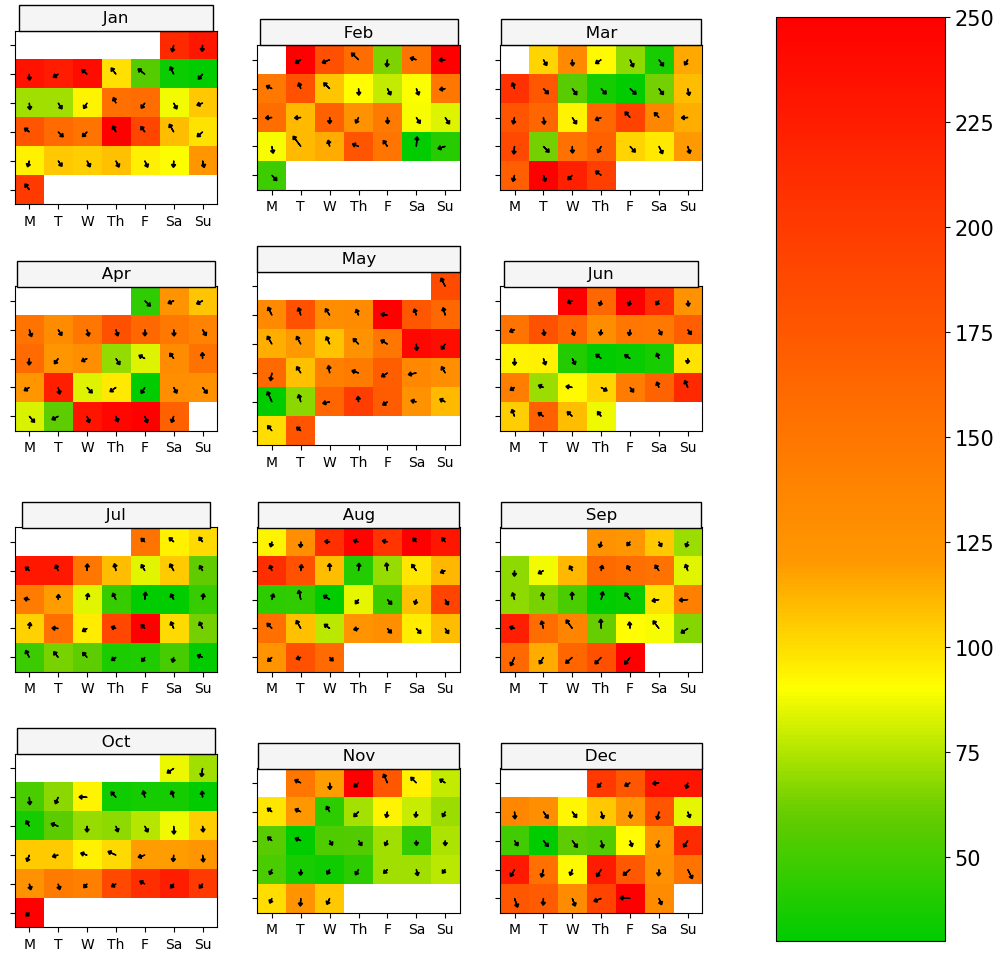

In [67]:
def calendar_plot(df:pd.DataFrame, pollutant:str, year:str, country:str,savefig:bool=False, **kwargs):
   
    
    import datetime as dt
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import numpy as np
    import pandas as pd
    from numpy import array
    from utils import Legend
    import calendar

    cvals = Legend.country_pollutants[country][pollutant]["bin_edges"]
    colors = Legend.country_pollutants[country][pollutant]["color_scale"]

    norm = plt.Normalize(min(cvals), max(cvals))
    tuples = list(zip(map(norm, cvals), colors))
    cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

    def calendar_array(dates, data):
        """ creates the calendar array returning i,j giving
            positional values in the array
        """
        #print('datesss',dates)
        #print('dataaaaaaaa',data)
        i, j = zip(*[d.isocalendar()[1:] for d in dates])

        i = np.array(i) - min(i)
        
        k = []
        flag = 0
        for n in range(i.shape[0]):
            if i[n]>5:
                k.append(0)
                flag = 1
            else:
                if flag == 0:
                    k.append(i[n])
                else:
                    k.append(i[n]+1)
        i = np.array(k)
        
        #print('I',i)
        j = np.array(j) - 1
        #print('J',j)
        ni = max(i)+1
        #ni=7
        #print('NI',ni)

        calendar = np.nan * np.zeros((ni, 7))
        #calendar[i,j]=[0,0]
        calendar[i, j] = data
        #print(calendar[i, j])    
        #print('calendar',calendar[i,j])
        
        return i, j, calendar

    def calendar_heatmap(ax, dates, data):
        """ Sets heatmap information
        """
        i, j, calendar = calendar_array(dates, data)
        im = ax.imshow(calendar, interpolation="none", cmap=cmap)
        label_days(ax, dates, i, j, calendar)

    def label_days(ax, dates, i, j, calendar):
        """ Based on the day of the week, it will print that 
            text on each box of the day. The arrow is also ploted on
            each box for every day converting the given wind direction
            to a xy coordinate
        """
        ni, nj = calendar.shape
        day_of_month = np.nan * np.zeros((ni, 7))
        day_of_month[i, j] = [d.day for d in dates]
        #print(i,j)

        for (row, col), day in np.ndenumerate(day_of_month):
            if np.isfinite(day):
                ax.arrow(
                    col,
                    row,
                    avg_ws[int(day) - 1 + a]
                    * np.cos(avg_wd[int(day) - 1 + a] * np.pi / 180.0)
                    / 15.0,
                    -avg_ws[int(day) - 1 + a]
                    * np.sin(avg_wd[int(day) - 1 + a] * np.pi / 180.0)
                    / 15.0,
                    head_width=0.15,
                    head_length=0.1,
                    fc="k",
                    ec="k",
                )

        ax.set_yticklabels([])
        ax.set_xticks([0,1,2,3,4,5,6])
        ax.set_xticklabels(['M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'])

    # =============================================================================
    #     Cuts given data to show average of each day.
    #     Adds a month coloumn to the df as well
    # =============================================================================

    df.index = pd.to_datetime(df.date)
    df = df.drop("date", axis=1)
    df_year = df[year].resample("1D").mean()
    df_year["month"] = df_year.index.month
    df_year.index.dayofweek

    t = 1

    fig, ax = plt.subplots(figsize=(12, 12), nrows=4, ncols=4)

    # =============================================================================
    #     """ Plots 12 seperate plots that are then put togeather in a
    #         4x4 arrangement with the last column being used to plot
    #         the colorbar
    #     """
    # =============================================================================
    while t <= 12:
     

        avg_ws = []
        avg_wd = []
        avg_pm25 = []
        df_year_1 = df_year[df_year.month == t]
        avg_wd = df_year_1["wd"]
        avg_ws = df_year_1["ws"]
        avg_pm25 = df_year_1[pollutant]

        #i = 0
        a = 0
        b = len(avg_pm25)
       
        data = avg_pm25[a:b]
        num = len(data)
        
        start = dt.datetime(int(year), t, 1)
        dates = [start + dt.timedelta(days=i) for i in range(num)]

        month_labels = [
                "               Jan               ",
                "               Feb               ",
                "               Mar               ",
                "               Apr               ",
                "               May               ",
                "               Jun               ",
                "               Jul               ",
                "               Aug               ",
                "               Sep               ",
                "               Oct               ",
                "               Nov               ",
                "               Dec               ",
            ]
        ax[(t - 1) // 3][(t - 1) % 3].set_title(
                month_labels[t - 1], bbox=dict(facecolor="whitesmoke")
            )
        calendar_heatmap(ax[(t - 1) // 3][(t - 1) % 3], dates, data)
           # i = i + 1
        t = t + 1


    #plt.tight_layout()

    # =============================================================================
    #    Colorbar plotting
    # =============================================================================
    grid = plt.GridSpec(4, 4, wspace=0.5, hspace=0.5)
    
    cbar_ax = plt.subplot(grid[:, 3])
    cb1 = mpl.colorbar.ColorbarBase(
        cbar_ax, cmap=cmap, norm=norm, orientation="vertical"
    )
    cb1.ax.tick_params(labelsize=15)
    if savefig:
        plt.savefig("Calendarplot.png", bbox_inches="tight")
        print("Your plots has also been saved")

    plt.show()
    #plt.close("all")

    
    
    
    
    
    
#df.dropna(subset=['pm25'],inplace=True)
calendar_plot(df, 'pm25', '2022','India',savefig=True)


#remove the warnings

In [52]:
benzene = df[['date','pm25','co','nox', 'o3', 'pm10']]

#benzene.dropna(inplace=True)
benzene.fillna(method='ffill', inplace=True)


C:\Users\Harshit Jain\AppData\Local\Temp\ipykernel_13260\4002905457.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# summary_plot

Plots import summary of data frame given. Plots line plots
and histograms for each polutant as well as statiscs such as 
mean,max,min,median, and 95th percentile

Parameters:
----------


    df: pd.DataFrame
        minimally containing date and at least one other
        numeric variable

     savefig:bool
        Saves the figure

C:\Users\Harshit Jain\AppData\Local\Temp\ipykernel_13260\239403503.py:22: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



pm25
min = 10.55
max = 540.96
missing = 0
mean = 114.23
median = 93.21
95th percentile = 280.98

co
min = 0.00
max = 5.74
missing = 0
mean = 1.41
median = 1.02
95th percentile = 3.56

nox
min = 5.45
max = 261.68
missing = 0
mean = 58.03
median = 44.14
95th percentile = 157.58

o3
min = 2.98
max = 50.11
missing = 0
mean = 15.42
median = 12.47
95th percentile = 33.09

pm10
min = 18.67
max = 678.25
missing = 0
mean = 242.54
median = 234.26
95th percentile = 465.12



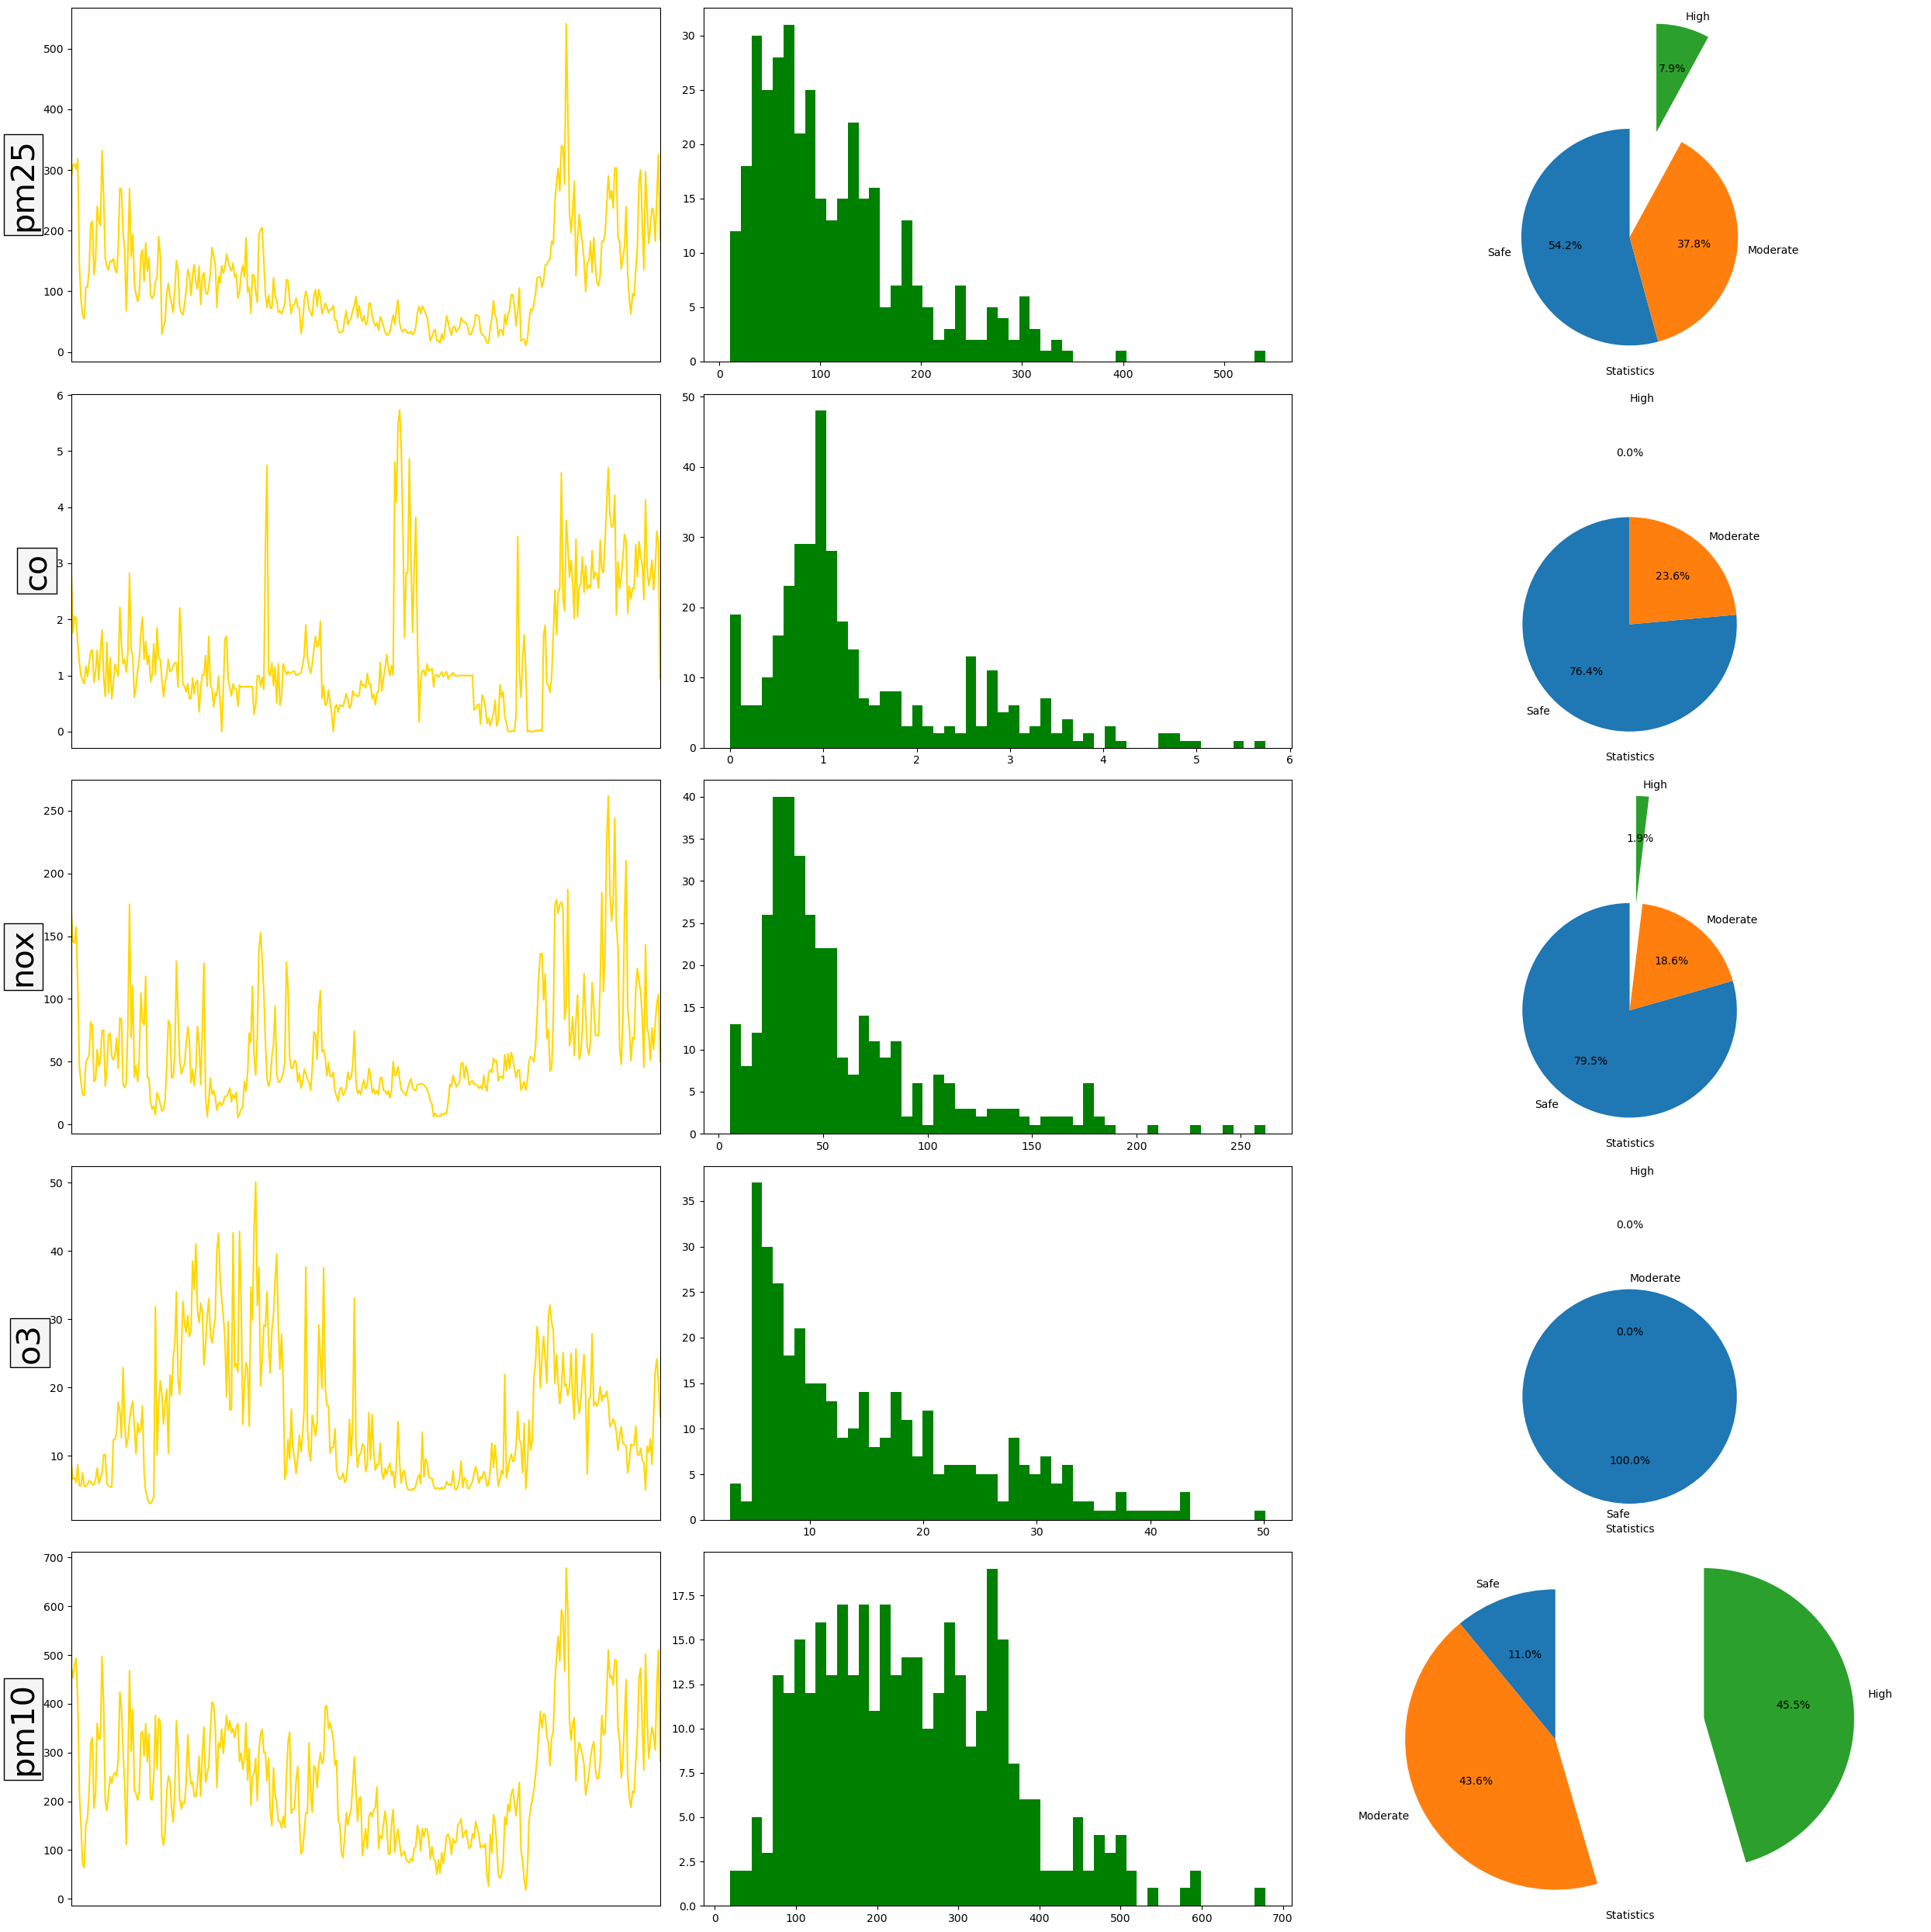

your plots has also been saved


In [71]:
def summary_plot(df:pd.DataFrame,savefig:bool=True):
  
    # Initialize variables
    pollutants = ["pm10", "pm25", "sox", "co", "o3", "nox", "pb", "nh3"]
    categories = ["s", "m", "h"]

    counts = {pollutant: {category: 0 for category in categories} for pollutant in pollutants}

    
    df.index = pd.to_datetime(df.date)
    df = df.drop("date", axis=1)
    df_all = df.resample("1D")
    df_all = df.copy()
    df_all = df_all.fillna(method="ffill")
    #print(df_all.columns)

    # Calculate counts for each pollutant category
    for pollutant in pollutants:
        if pollutant in df_all.columns:
            column_data = df_all[pollutant]
            #print(df_all)
            for _, data in column_data.iteritems():
                if pollutant in ["pm10", "pm25"]:
                    if data < 100:
                        counts[pollutant]["s"] += 1
                    elif data < 250:
                        counts[pollutant]["m"] += 1
                    else:
                        counts[pollutant]["h"] += 1
                elif pollutant == "co":
                    if data < 2:
                        counts[pollutant]["s"] += 1
                    elif data < 10:
                        counts[pollutant]["m"] += 1
                    else:
                        counts[pollutant]["h"] += 1
                elif pollutant == "sox":
                    if data <= 80:
                        counts[pollutant]["s"] += 1
                    elif data <= 380:
                        counts[pollutant]["m"] += 1
                    else:
                        counts[pollutant]["h"] += 1
                elif pollutant == "o3":
                    if data < 100:
                        counts[pollutant]["s"] += 1
                    elif data < 168:
                        counts[pollutant]["m"] += 1
                    else:
                        counts[pollutant]["h"] += 1
                elif pollutant == "nox":
                    if data < 80:
                        counts[pollutant]["s"] += 1
                    elif data < 180:
                        counts[pollutant]["m"] += 1
                    else:
                        counts[pollutant]["h"] += 1
                elif pollutant == "pb":
                    if data <= 1:
                        counts[pollutant]["s"] += 1
                    elif data <= 2:
                        counts[pollutant]["m"] += 1
                    else:
                        counts[pollutant]["h"] += 1
                elif pollutant == "nh3":
                    if data <= 400:
                        counts[pollutant]["s"] += 1
                    elif data <= 800:
                        counts[pollutant]["m"] += 1
                    else:
                        counts[pollutant]["h"] += 1
         
                

    # Plot line, histogram, and pie charts for each pollutant
    fig, axes = plt.subplots(len(df_all.columns), 3, figsize=(25,25))

    for i, pollutant in enumerate(df_all.columns):
        ax_line = axes[i, 0]
        ax_hist = axes[i, 1]
        ax_pie = axes[i, 2]

        df_all[pollutant].plot.line(ax=ax_line, color="gold")
        ax_line.axes.get_xaxis().set_visible(False)
        ax_line.yaxis.set_label_position("left")
        ax_line.set_ylabel(pollutant, fontsize=30, bbox=dict(facecolor="whitesmoke"))

        ax_hist.hist(df_all[pollutant], bins=50, color="green")

        labels = ["Safe", "Moderate", "High"]
        sizes = [counts[pollutant][category] for category in categories]
        explode = [0, 0, 1]

        ax_pie.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=False, startangle=90)
        ax_pie.axis("equal")

        ax_pie.set_xlabel("Statistics")
      
        print(f"{pollutant}\nmin = {df_all[pollutant].min():.2f}\nmax = {df_all[pollutant].max():.2f}\nmissing = {df_all[pollutant].isna().sum()}\nmean = {df_all[pollutant].mean():.2f}\nmedian = {df_all[pollutant].median():.2f}\n95th percentile = {df_all[pollutant].quantile(0.95):.2f}\n")


    if savefig:
        plt.savefig("summaryPlot.png", dpi=300, format="png")
        plt.tight_layout()
        plt.show()
        print("your plots has also been saved")
    plt.close()
    

summary_plot(benzene,savefig=True)


#should also show a line on histogram.like kde
#add savefig in parameter

# time_plot

Plots seasonal and yearly plot of a pollutant
Winter[Jan,Feb,Dec],
Spring[Mar,Apr,May],
Summer[Jun,July,Aug],
Autumn[Sep,Oct,Nov]

Parameters:
-----------

    df: data frame
        a data frame of time series. Must have a date field
        and at least one variable to plot
    year: str
        year of which data will be cut
    pollutants: list
        column names of pollutatnts to compare
    seasonal:bool
        shows seasonal plots
    savefig:bool
        saves the plots

Your plots has also been saved


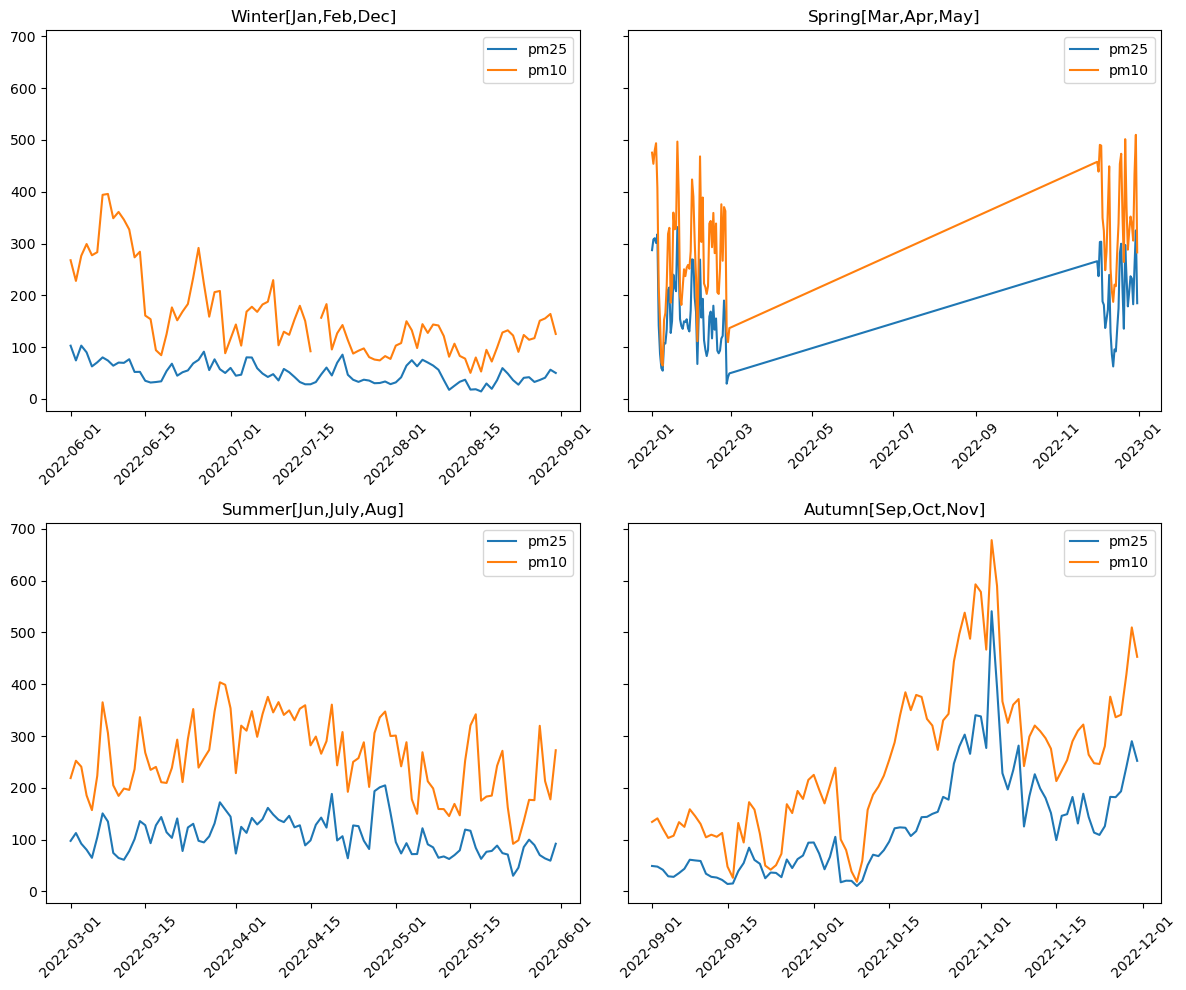

In [73]:

def time_plot(df: pd.DataFrame, year: str, pollutants: list = ["pm25"], seasonal: bool = True,savefig:bool=False):
    df.index = pd.to_datetime(df.date)
    df_n_1 = df[df.index.year == int(year)]

    if seasonal:
        
        summer = [6, 7, 8]
        winter = [1,2, 12]
        spring = [3, 4, 5]
        autumn = [9, 10, 11]

        # Create subplots for each season
        fig, axs = plt.subplots(2, 2, figsize=(12, 10),sharey=True)
        axs = axs.flatten()

        seasons = [summer, winter, spring, autumn]
        season_labels = ["Winter[Jan,Feb,Dec]", "Spring[Mar,Apr,May]", "Summer[Jun,July,Aug]","Autumn[Sep,Oct,Nov]"]

        for ax, season, label in zip(axs, seasons, season_labels):
            df_season = df_n_1[df_n_1.index.month.isin(season)]

            for pollutant in pollutants:
                values = df_season[pollutant]
                ax.plot(values.index, values.values, label=pollutant)

            ax.set_title(label)
            ax.legend()
            ax.tick_params(axis="x", rotation=45)

        fig.tight_layout()
        if savefig:
                 plt.savefig("Time_plot.png", bbox_inches="tight")
                 print("Your plots has also been saved")
            
        plt.show()
    else:
      
        fig = go.Figure()

        for pollutant in pollutants:
            if pollutant in df_n_1.columns:
                values = df_n_1[pollutant]

                # Add trace for each selected pollutant
                fig.add_trace(go.Scatter(
                    x=values.index,
                    y=values.values,
                    name=pollutant
                ))
            else:
                print(f"Warning: {pollutant} data not found.")

        # Configure layout
        fig.update_layout(
            xaxis=dict(
                rangeselector=dict(
                    buttons=list([
                        dict(count=1, label="1d", step="day", stepmode="backward"),
                        dict(count=7, label="1w", step="day", stepmode="backward"),
                        dict(count=1, label="1m", step="month", stepmode="backward"),
                        dict(count=6, label="6m", step="month", stepmode="backward"),
                        dict(count=1, label="YTD", step="year", stepmode="todate"),
                        dict(count=1, label="1y", step="year", stepmode="backward"),
                        dict(step="all")
                    ])
                    #active=2
                ),
                rangeslider=dict(
                    visible=True
                ),

                type="date"
            )
        )

        fig.show()


time_plot(df, "2022", pollutants=["pm25", "pm10"], seasonal=True,savefig=True)
time_plot(df, "2022", pollutants=["pm25", "pm10"], seasonal=False)

#change the x labels as its too confusing



# googleMaps

Plots a geographical plot.
Plots a folium plot of longitude and latitude points 
provided with information about each point when clicked 
on.

 Parameters:
 -------
   
    df: pandas.DataFrame
        minimally containing date and values of pollutant, city,
        longitude, latitude, and AQI
    lat: str
        Name of column in df of where latitude points are
    long: str
        Name of column in df of where longitude points are
    pollutant: str
        Name of pollutant 
    date:str
        Date to extract the data
    markersize:int
        int to multiply the pollutant
    zoom:int
        initial zoom in the map
    

In [56]:
def google_maps(df:pd.DataFrame, lat:str, long:str, pollutant:str, date:str, markersize:int,zoom:int):
    df1 = df[df['date'] == date]
    lat = df1[lat].values[0]
    long = df1[long].values[0]
    my_map4 = folium.Map(location=[lat, long], zoom_start=zoom)

    for lat, long, pol, st in zip(df['latitude'], df['longitude'], df[pollutant], df['station']):
        folium.CircleMarker([lat, long], radius=markersize * pol, popup=(str(st).capitalize() + "<br>" + str(round(pol, 3))), fill=True, fill_opacity=0.7, color='red').add_to(my_map4)
        my_map4.save("googleMaps.html")
        
    print('your map has been saved')
    # Display map in Jupyter Notebook
    return my_map4
 

map_obj = google_maps(df, 'latitude', 'longitude', 'pm25', '2022-08-23', 0.04,1)
map_obj


#Perfect

your map has been saved


# Theilsen Plot

Connected scatter plot.Plots a connected scatter plot of the average value of the pollutant every month of every year. Then plots a line of best fit through the plot showing the user the overall trend of the pollutant through the years.

 Parameters:
 -----
    
    df: data frame
        minimally containing date and at least one other
        pollutant 
    pollutant: type string
        A pollutant name correspoinding to 
        a variable in a data frame, ex: 'pm25'
    savefig:bool
        saves the plots



C:\Users\Harshit Jain\AppData\Local\Temp\ipykernel_13260\2626831210.py:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Your plot has also been saved


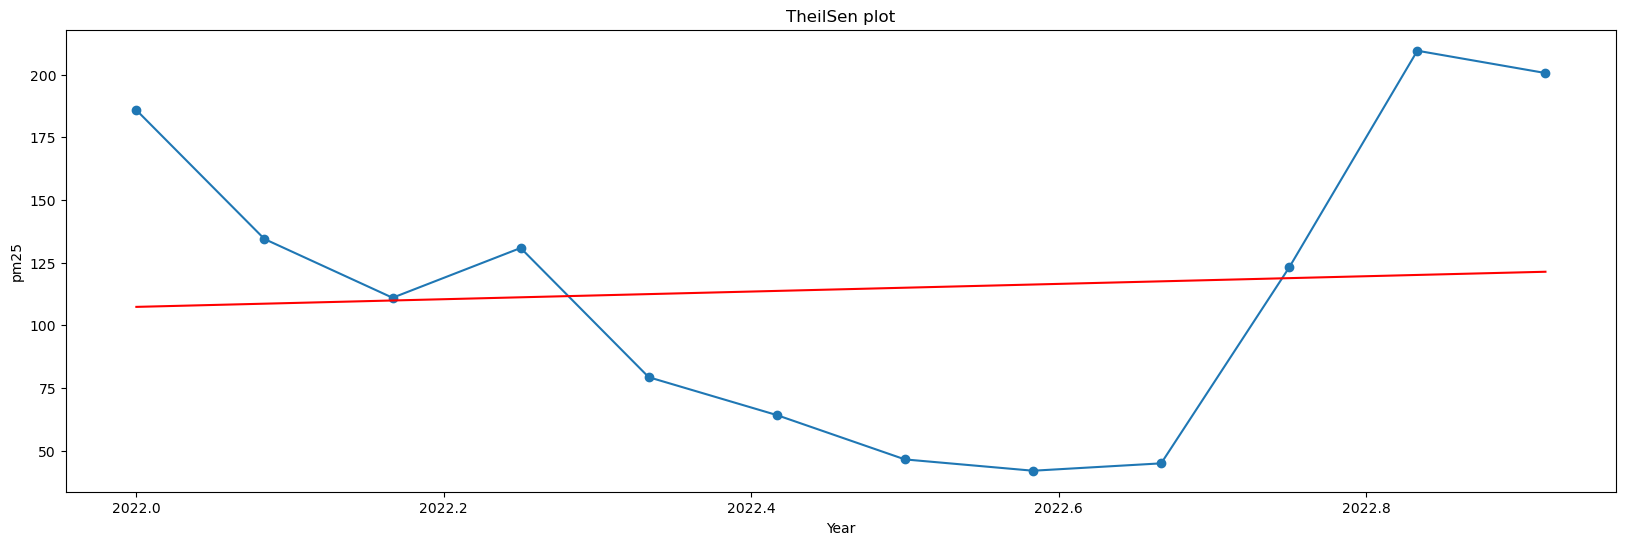

In [69]:
def Theilsen(df:pd.DataFrame, pollutant:str,savefig:bool=False):
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    from matplotlib.ticker import ScalarFormatter

    df.index = pd.to_datetime(df.date)
    unique_years = np.unique(df.index.year)

    var2 = []
    scatterX = []

    for year in unique_years:
        df_year = df[df.index.year == year]
        df_monthly = df_year.resample("M").mean()
        monthly_mean = df_monthly[pollutant].values
        var2.extend(monthly_mean)
        scatterX.extend(np.arange(len(monthly_mean)) / 12 + year)

    y = np.array(var2)
    x = np.array(scatterX)

    def best_fit(X, Y):
        xbar = np.mean(X)
        ybar = np.mean(Y)
        n = len(X)

        numer = np.sum(X * Y) - n * xbar * ybar
        denum = np.sum(X ** 2) - n * xbar ** 2

        b = numer / denum
        a = ybar - b * xbar

        return a, b

    a, b = best_fit(x, y)

    fig, ax = plt.subplots()
    ax.plot(x, y, "-o")
    ax.set_xlabel("Year")
    ax.set_ylabel(pollutant)
    ax.set_title("TheilSen plot")
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="red")

    # Format y-axis tick labels
    ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    if savefig:
        plt.savefig("TheilSenplot.png", bbox_inches="tight")
        print("Your plot has also been saved")

    plt.show()

Theilsen(df, 'pm25',savefig=True)

#understand logic behind this
#remove the warning


# Scatter_plot

Draw a plot of two variables with bivariate and univariate graphs.

Parameters:
-----
    
    df: data frame 
        data frame containing at least 
        2 numeric variables to plot
    x: type string
        name of x variable to plot
    y: type string
        name of y variable to plot   
    hue:vector or key in data
        Semantic variable that is mapped to determine the color of plot element that is mapped to determine the                     color of plot elements.
    kind:str{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
        Kind of plot to draw. See the examples for references to the underlying functions.
    savefig:bool
        saves the plots
        

Your plot has also been saved
Your plot has also been saved
Your plot has also been saved
Your plot has also been saved


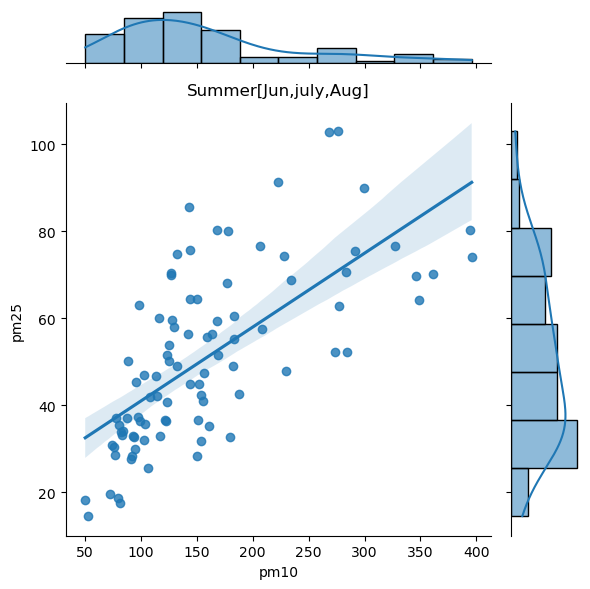

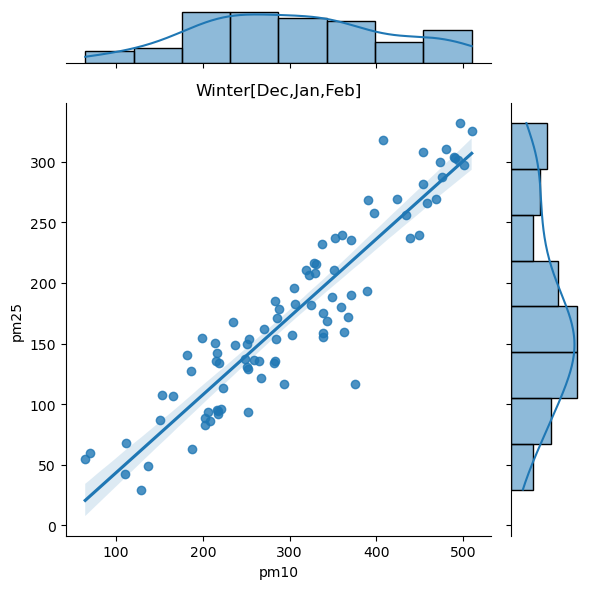

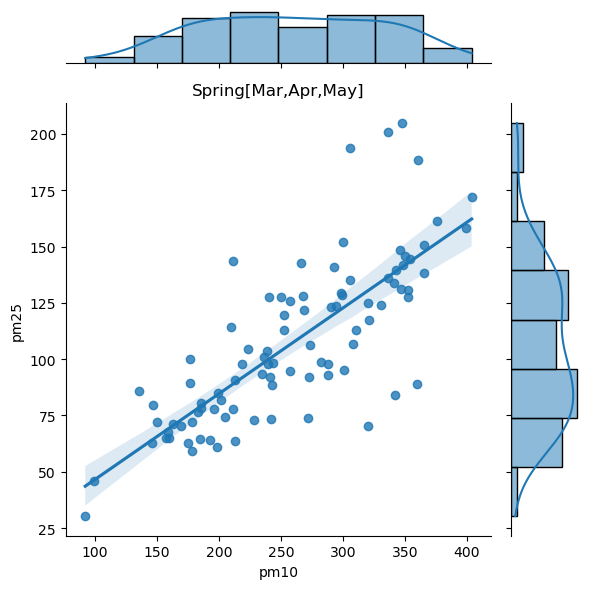

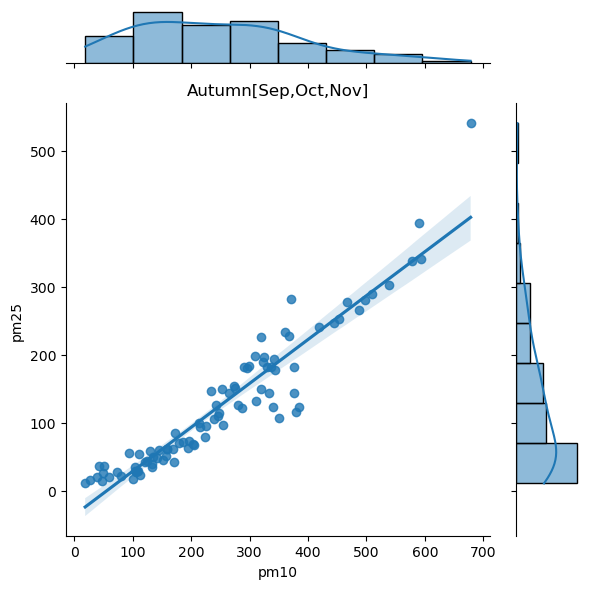

Your plot has also been saved


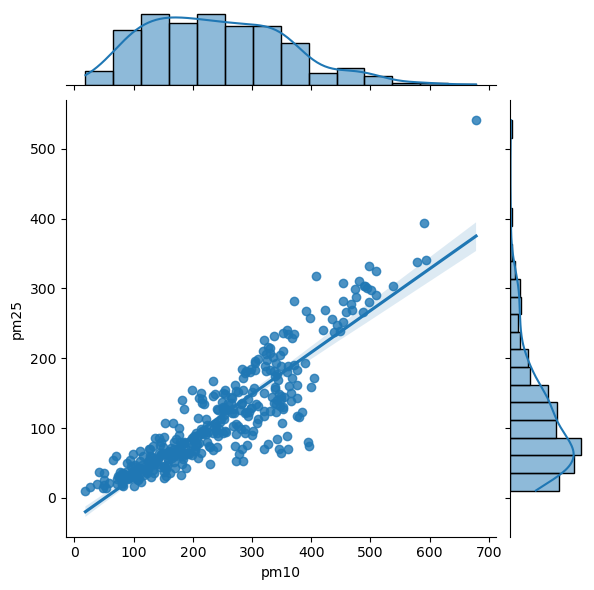

In [23]:

def scatter_plot(df: pd.DataFrame, x: str, y: str, seasonal: bool = True, hue: Optional[str] = None, kind: str = 'reg', savefig: bool = False):
    df.index = pd.to_datetime(df.date)
    flag=0
    if seasonal:
        summer = [6, 7, 8]
        winter = [1, 2, 12]
        spring = [3, 4, 5]
        autumn = [9, 10, 11]

        seasons = [summer, winter, spring, autumn]
        season_labels = ["Summer[Jun,july,Aug]", "Winter[Dec,Jan,Feb]", "Spring[Mar,Apr,May]", "Autumn[Sep,Oct,Nov]"]

        for season, label in zip(seasons, season_labels):
            df_season = df[df.index.month.isin(season)]
            sns.jointplot(data=df_season, x=x, y=y, hue=hue, kind=kind)
            plt.title(label)
            plt.tight_layout()
        
            if savefig:
                plt.savefig("scatterPlot"+str(label)+".png", bbox_inches="tight", dpi=300)
                print("Your plot has also been saved")
        

    else:
        #sns.pairplot(df,kind=kind)
        sns.jointplot(data=df, x=x, y=y, hue=hue,kind=kind)
        if savefig:
                plt.savefig("scatterPlot.png", bbox_inches="tight", dpi=300)
                print("Your plot has also been saved")
        

    
    plt.show()

scatter_plot(df, 'pm10', 'pm25', seasonal=True,savefig=True, kind='reg')
scatter_plot(df, 'pm10', 'pm25', seasonal=False,savefig=True, kind='reg')



#try to make seasonal in 2x2
#change the func name

# time_variation

Plots four plots:
- The average pollutant level per day by 
each hour for each day of the week across all of the data
- The average pollutant level by each hour, 
across all data
- The average pollutant level by each month of the
year for across data
- The average pollutant level per day of the week 
across all data


Parameters:
------

        df: pandas.DataFrame
          data frame of hourly data. 
          Must include a date field and at least one variable to plot
        pollutant: str
          Name of variables to plot
        savefig:bool
            saves the plots


C:\Users\Harshit Jain\AppData\Local\Temp\ipykernel_13260\2631621498.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Harshit Jain\AppData\Local\Temp\ipykernel_13260\2631621498.py:64: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Harshit Jain\AppData\Local\Temp\ipykernel_13260\2631621498.py:65: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users

Your plots has also been saved


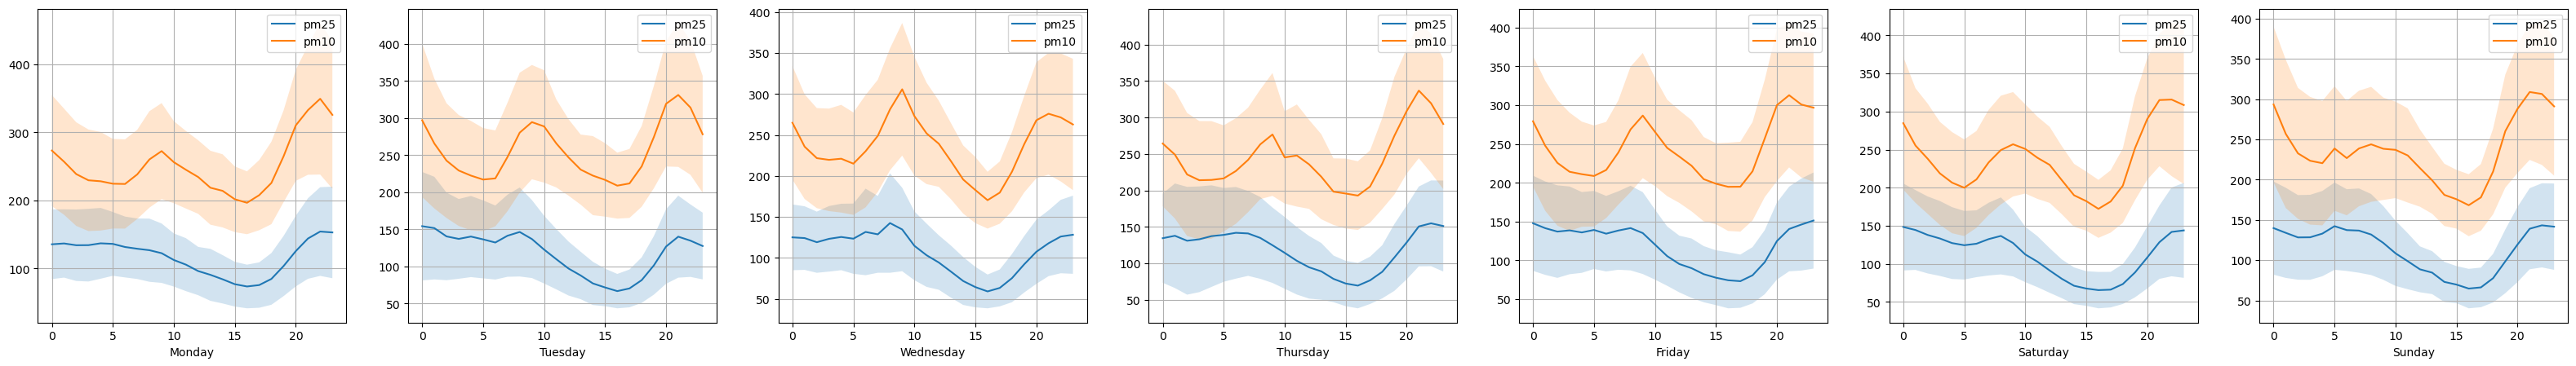

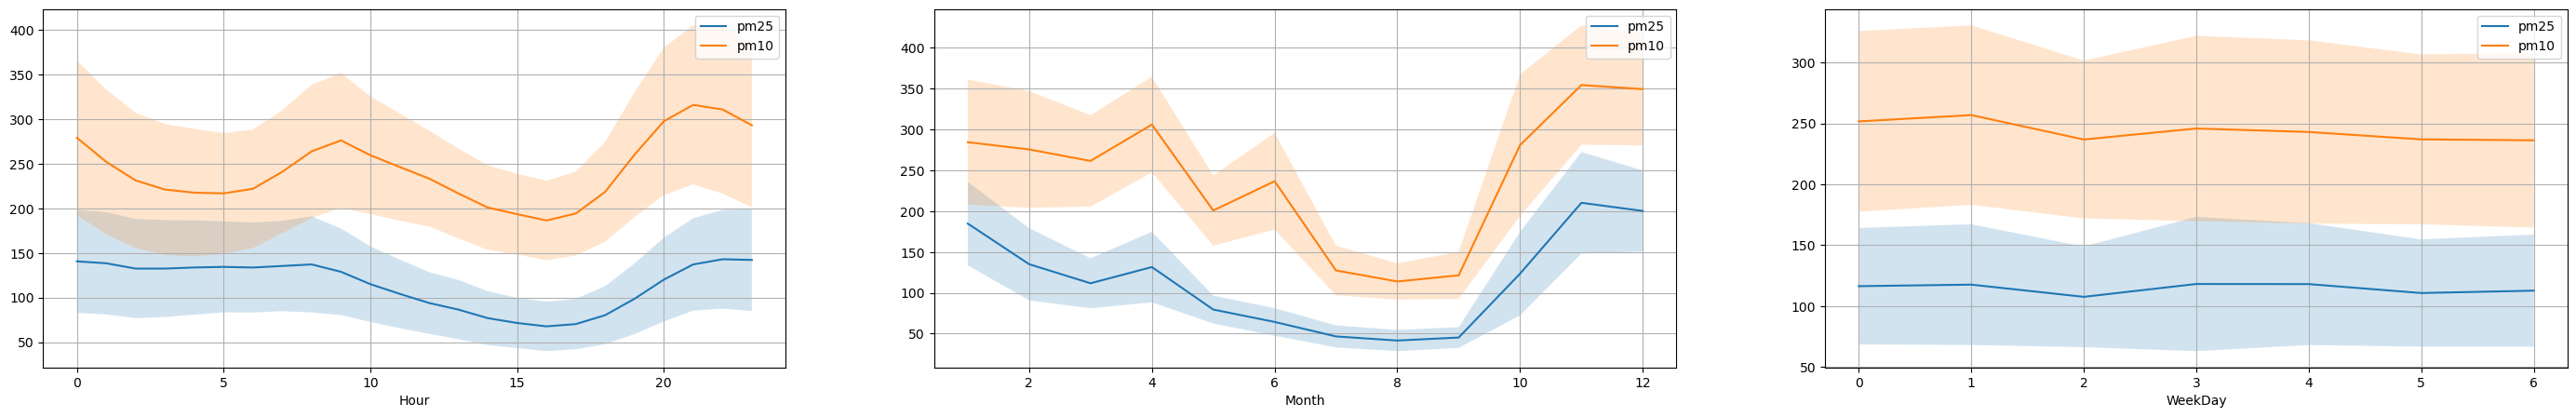

In [62]:
df1 = pd.read_csv(r'C:\Users\Harshit Jain\Desktop\delhiaq\hourlydata.csv')
df1.columns = df1.columns.str.lower()
df1.rename(columns={'Date':'date','pm2.5':'pm25','ozone':'o3','tot-rf':'totrf'}, inplace=True)
df1 = df1[df1['station'] == 'Wazirpur, Delhi - DPCC'] 

def time_variation(df:pd.DataFrame, pollutant:list=['pm25'],savefig:bool=False):
   
    
    #print(pollutants)
    df["date"] = pd.to_datetime(df.date)

    df_days=df
    df_hour=df
    df_month=df
    df_weekday = df
    
    df_days["day"] = df_days["date"].dt.day_name()
    df_days = df_days.set_index(keys=["day"])
    df_days = df_days.groupby(["day"])

    dayWeek = [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]

    for i in range(len(dayWeek)):
        plt.figure(1, figsize=(40, 5))
        plt.subplot(1, 7, i + 1)
        plt.grid()

        df_day = df_days.get_group(dayWeek[i])
        df_day["hour"] = df_day["date"].dt.hour

        df_day_m = df_day.groupby("hour").mean().reset_index()
        df_day_s = df_day.groupby("hour").std().reset_index()
       

        for k in range(len(pollutant)):
            plt.plot(df_day_m["hour"], df_day_m[pollutant[k]], label=pollutant[k])
            plt.fill_between(
                df_day_s["hour"],
                df_day_m[pollutant[k]] - 0.5 * df_day_s[pollutant[k]],
                df_day_m[pollutant[k]] + 0.5 * df_day_s[pollutant[k]],
                alpha=0.2,
            )
            plt.xlabel(dayWeek[i])
            plt.legend()
    if savefig:
        plt.savefig("TimeVariationPlots1.png", bbox_inches="tight")

    plt.figure(2, figsize=(35, 5))
    plt.subplot(1, 3, 1)
    plt.grid()

    df_hour["hour"] = df_hour["date"].dt.hour
    df_hour_m = df.groupby("hour").mean().reset_index()
    df_hour_s = df.groupby("hour").std().reset_index()
    
    for i in range(len(pollutant)):
        plt.plot(df_hour_m["hour"], df_hour_m[pollutant[i]], label=pollutant[i])
        plt.fill_between(
            df_hour_s["hour"],
            df_hour_m[pollutant[i]] - 0.5 * df_hour_s[pollutant[i]],
            df_hour_m[pollutant[i]] + 0.5 * df_hour_s[pollutant[i]],
            alpha=0.2,
        )
        plt.xlabel("Hour")
        plt.legend()

    plt.subplot(1, 3, 2)
    plt.grid()

    df_month["month"] = df_month["date"].dt.month
    df_month_m = df_month.groupby("month").mean().reset_index()
    df_month_s = df_month.groupby("month").std().reset_index()
    
    for i in range(len(pollutant)):
        plt.plot(df_month_m["month"], df_month_m[pollutant[i]], label=pollutant[i])
        plt.fill_between(
            df_month_s["month"],
            df_month_m[pollutant[i]] - 0.5 * df_month_s[pollutant[i]],
            df_month_m[pollutant[i]] + 0.5 * df_month_s[pollutant[i]],
            alpha=0.2,
        )
        plt.xlabel("Month")
        plt.legend()

    plt.subplot(1, 3, 3)
    plt.grid()
    
    df_weekday["weekday"] = df_weekday["date"].dt.weekday
    df_weekday_m = df_weekday.groupby("weekday").mean().reset_index()
    df_weekday_s = df_weekday.groupby("weekday").std().reset_index()

    for i in range(len(pollutant)):
        plt.plot(
            df_weekday_m["weekday"], df_weekday_m[pollutant[i]], label=pollutant[i]
        )
        plt.fill_between(
            df_weekday_s["weekday"],
            df_weekday_m[pollutant[i]] - 0.5 * df_weekday_s[pollutant[i]],
            df_weekday_m[pollutant[i]] + 0.5 * df_weekday_s[pollutant[i]],
            alpha=0.2,
        )
        plt.xlabel("WeekDay")
        plt.legend()
    if savefig:
        plt.savefig("TimeVariationPlots2.png", bbox_inches="tight")
        print("Your plots has also been saved")
    plt.show()
    

time_variation(df1, pollutant=['pm25','pm10'],savefig=True)


#add param for savefig
#remove all these warnings
#remove extra empty plots


# trend_level


Plot that shows the overall pollutant trend for every year in the 
df. It takes the average hour value of each month and plots a heatmap
showing what timesof the year there is a high concentration of the 
pollutant.

Parameters:
-----------
                df: pd.DataFrame
                    data frame of complete data
                pollutant: str
                    Name of the data series in df to produce plot

  

Your plots has also been saved
Your plots has also been saved


<Axes: title={'center': '2022'}, ylabel='Hour of the Day'>

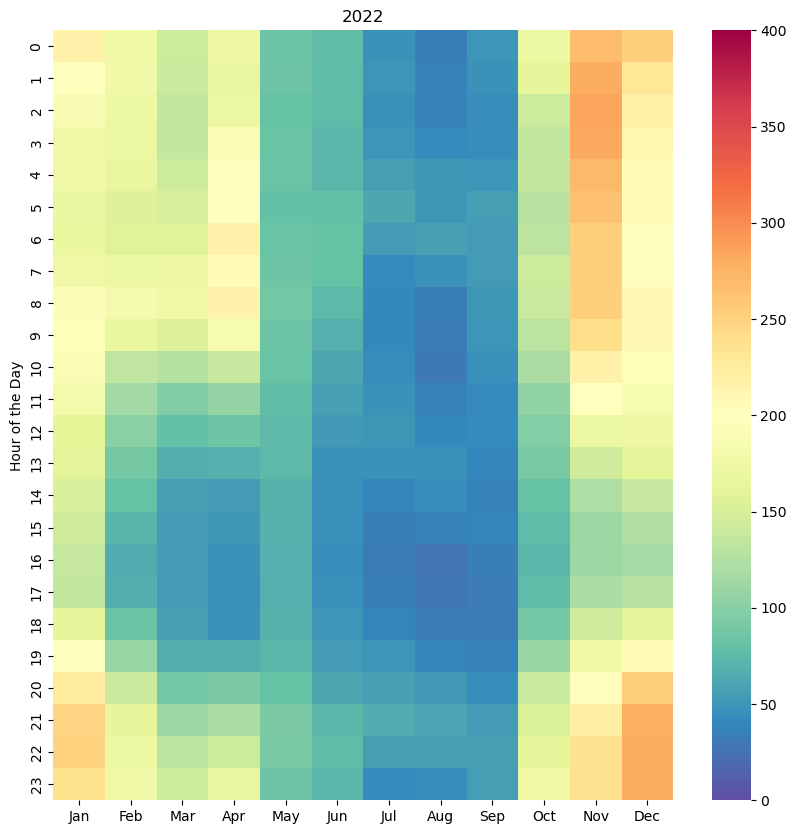

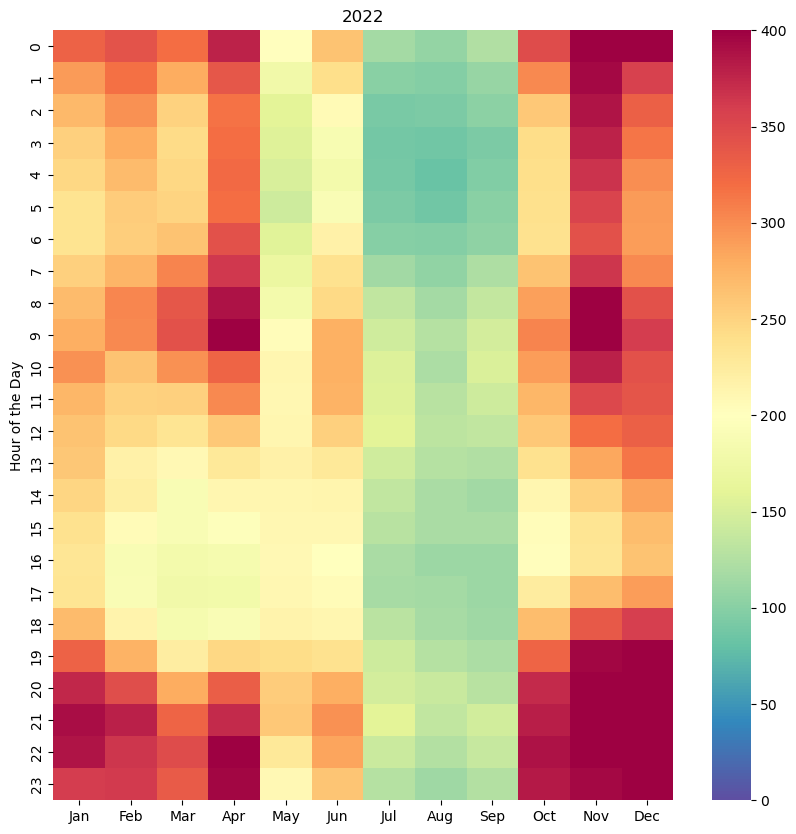

In [61]:


# dailydata=xr.open_dataset(r'C:\Users\Harshit Jain\Desktop\delhiaq\hourlydata.csv')
# df1=dailydata.to_dataframe()
df1 = pd.read_csv(r'C:\Users\Harshit Jain\Desktop\delhiaq\hourlydata.csv')
df1.columns = df1.columns.str.lower()
df1.rename(columns={'Date':'date','pm2.5':'pm25','ozone':'o3','tot-rf':'totrf'}, inplace=True)
df1 = df1[df1['station'] == 'Wazirpur, Delhi - DPCC'] 

#print(df1)

def trend_level(df:pd.DataFrame, pollutant:str, savefig:bool=False,**kwargs):
    

    df.index = pd.to_datetime(df.date)
    pollutant_series = df[pollutant]

    unique_years = np.unique(df.index.year)[:6]
    num_unique_years = len(unique_years)

    fig, ax = plt.subplots(nrows=num_unique_years, figsize=(10, 10))

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
              'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    for i, unique_year in enumerate(unique_years):
        year_string = f"{unique_year}"

        pollutant_series_year = pollutant_series[year_string]

        t = pollutant_series_year.groupby(
            [pollutant_series_year.index.month, pollutant_series_year.index.hour]
        ).mean()

        num_cols = len(t) % 24
        if num_cols == 0:
            num_cols = 24

        two_d_array = t.values.reshape(12, num_cols).T

        heatmap = sns.heatmap(
            two_d_array,
            cbar=True,
            linewidth=0,
            cmap="Spectral_r",
            vmin=0,
            vmax=400,
            ax=ax[i] if num_unique_years > 1 else ax,
        )
        heatmap.set_xticklabels(months)
        heatmap.set_ylabel("Hour of the Day")
        heatmap.set_title(year_string)
        heatmap.invert_yaxis()

    if num_unique_years == 1:
        ax.set_xticklabels(months)
        ax.set_ylabel("Hour of the Day")
        ax.set_title(year_string)
        ax.invert_yaxis()
        
    if savefig:
        plt.savefig("Trendlevel.png", bbox_inches="tight")
        print("Your plots has also been saved")
    return ax

#df1 = df1[df1['date'].dt.year != 2023]
trend_level(df1, 'pm25',savefig=True)
trend_level(df1, 'pm10',savefig=True)


#PERFECT,works only on hourly data
#TODO:should also work for daily and monthly


# timeProp

Plot a stacked bar graph of all data in the df
based on frequency of wind direction in compass
directions. Takes the average of every 3 days
in each bar. The hight of the bar is value of 
the pollutant that 3 day period. The bars are 
binned proportionaly based on the overall value of the 
pollutant 


    

timeProp for pm10


C:\Users\Harshit Jain\anaconda3\lib\site-packages\vayu\timeProp.py:42: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

C:\Users\Harshit Jain\anaconda3\lib\site-packages\vayu\timeProp.py:47: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

C:\Users\Harshit Jain\anaconda3\lib\site-packages\vayu\timeProp.py:47: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



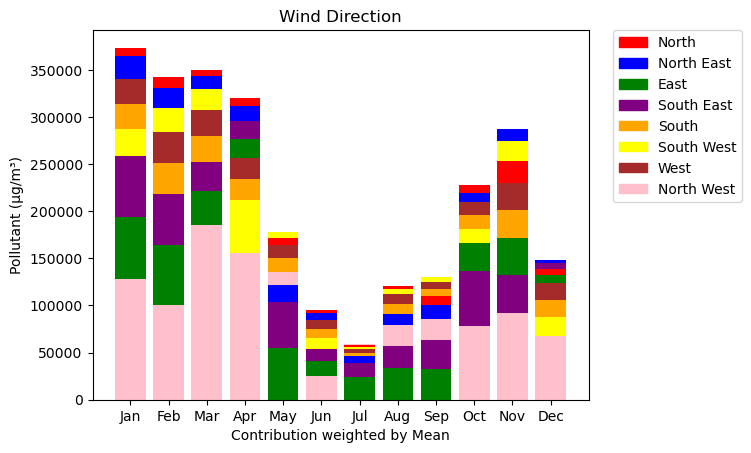

timeProp for pm25


C:\Users\Harshit Jain\anaconda3\lib\site-packages\vayu\timeProp.py:42: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

C:\Users\Harshit Jain\anaconda3\lib\site-packages\vayu\timeProp.py:47: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

C:\Users\Harshit Jain\anaconda3\lib\site-packages\vayu\timeProp.py:47: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



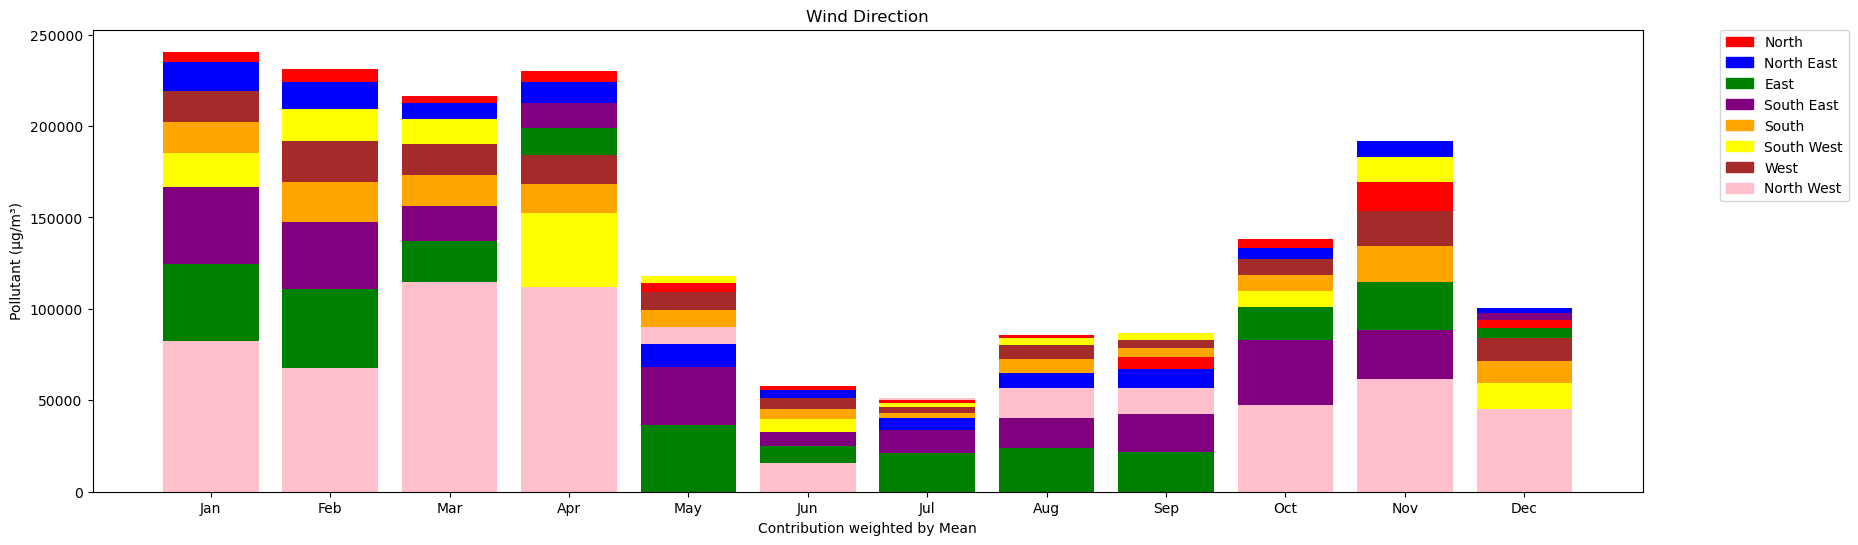

In [60]:
from vayu.timeProp import timeProp

pollutants = ['pm10','pm25']
for i, pollutant in enumerate(pollutants):
    print('timeProp for',pollutant)
    timeProp(df1, '2022', pollutant, 30, 'date', sorted_bars=True)
    
    
    
#works only on hourly data, should work on dailydata also
#savefig parameter
#change the func name

# pollutionRose

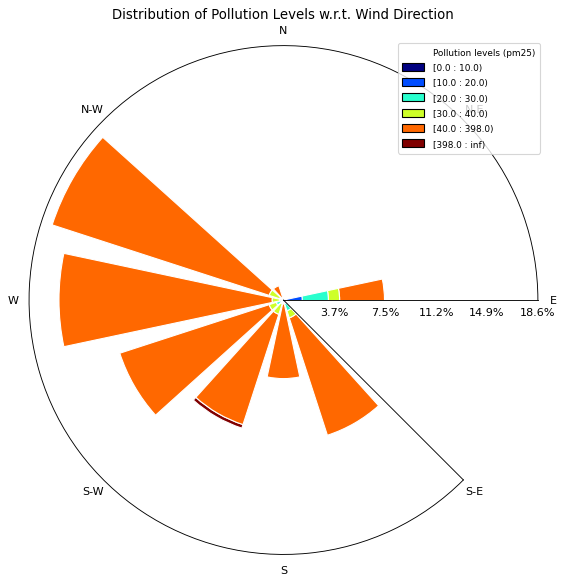

In [77]:
from vayu.pollutionRose import pollutionRose

pollutants = ['pm25']
for i, pollutant in enumerate(pollutants):
   
    pollutionRose(df, pollutant)
    

#Perfect, add savefig

# timeInteractiveScatterPlot


"""
Plots a time interactive scatter plot 
      of a given pollutant for given duration 
      of time.

  Parameters
  ----------
  
      df: data frame 
          minimally containing time stamps, location, 
          pollutant value, latitude and longitude

      date_time_col_name : type string
                           name of column in df having time stamps

      location_col_name : type string
                          name of column in df having station name

      value_col_name: type string
                      name of column in df having value of pollutant

      latitude_col_name : type string
                          name of column in df having latitute

      longitude_col_name : type string
                           name of column in df having longitude

      start_date: type string
                 time stamp corresponding to startdate,
                 ex : '2019-08-01 00:00:00+05:30'

      end_date : type string
                 time stamp corresponding to end date,
                 ex : '2019-08-05 00:00:00+05:30'

      pollutant_ID: type integer
                  A pollutant ID correspoinding to 
                  a pollutant, ex: 1 for PM2.5



In [33]:

from vayu.timeInteractiveScatterPlot import timeInteractiveScatterPlot
print(df1)
timeInteractiveScatterPlot(df1, 'date', 'station','pm25' , 'latitude', 'longitude', '2022-01-01 00:00:00', '2022-08-01 01:00:00', 1, width=800, height=660, location=[22, 82], zoom_start=4.5, control_scale=True, tiles='Stamen Terrain', min_lat=6, max_lat=105, min_lon=68, max_lon=97, period='PT1M', date_options='YYYY-MM-DD HH:mm')


#it should take only the column which is specified not oter columns

                                    station                date  \
date                                                              
2022-01-01 00:30:00  Wazirpur, Delhi - DPCC 2022-01-01 00:30:00   
2022-01-01 01:30:00  Wazirpur, Delhi - DPCC 2022-01-01 01:30:00   
2022-01-01 02:30:00  Wazirpur, Delhi - DPCC 2022-01-01 02:30:00   
2022-01-01 03:30:00  Wazirpur, Delhi - DPCC 2022-01-01 03:30:00   
2022-01-01 04:30:00  Wazirpur, Delhi - DPCC 2022-01-01 04:30:00   
...                                     ...                 ...   
2022-12-31 19:30:00  Wazirpur, Delhi - DPCC 2022-12-31 19:30:00   
2022-12-31 20:30:00  Wazirpur, Delhi - DPCC 2022-12-31 20:30:00   
2022-12-31 21:30:00  Wazirpur, Delhi - DPCC 2022-12-31 21:30:00   
2022-12-31 22:30:00  Wazirpur, Delhi - DPCC 2022-12-31 22:30:00   
2022-12-31 23:30:00  Wazirpur, Delhi - DPCC 2022-12-31 23:30:00   

                               from date              to date    pm25    pm10  \
date                                           

# smoothTrend


 Plots a connected scatter plot of the average value of
          the pollutant every month of every year. Then plots a
          smooth line of best fit through the plot showing the user
          the overall trend of the pollutant through the years.

  Parameters
  ----------
      df: data frame
        minimally containing date and at least one other
        pollutant 

     date: type string
       Name of the column having dates

     pollutant: type string
        A pollutant column name correspoinding to 
        a variable in a data frame, ex: 'pm25' 



C:\Users\Harshit Jain\anaconda3\lib\site-packages\vayu\smoothTrend.py:49: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_v = df[year[i]].resample("1D").mean()
C:\Users\Harshit Jain\anaconda3\lib\site-packages\vayu\smoothTrend.py:49: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_v = df[year[i]].resample("1D").mean()
C:\Users\Harshit Jain\anaconda3\lib\site-packages\vayu\smoothTrend.py:64: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_new = df[year[j]].resamp

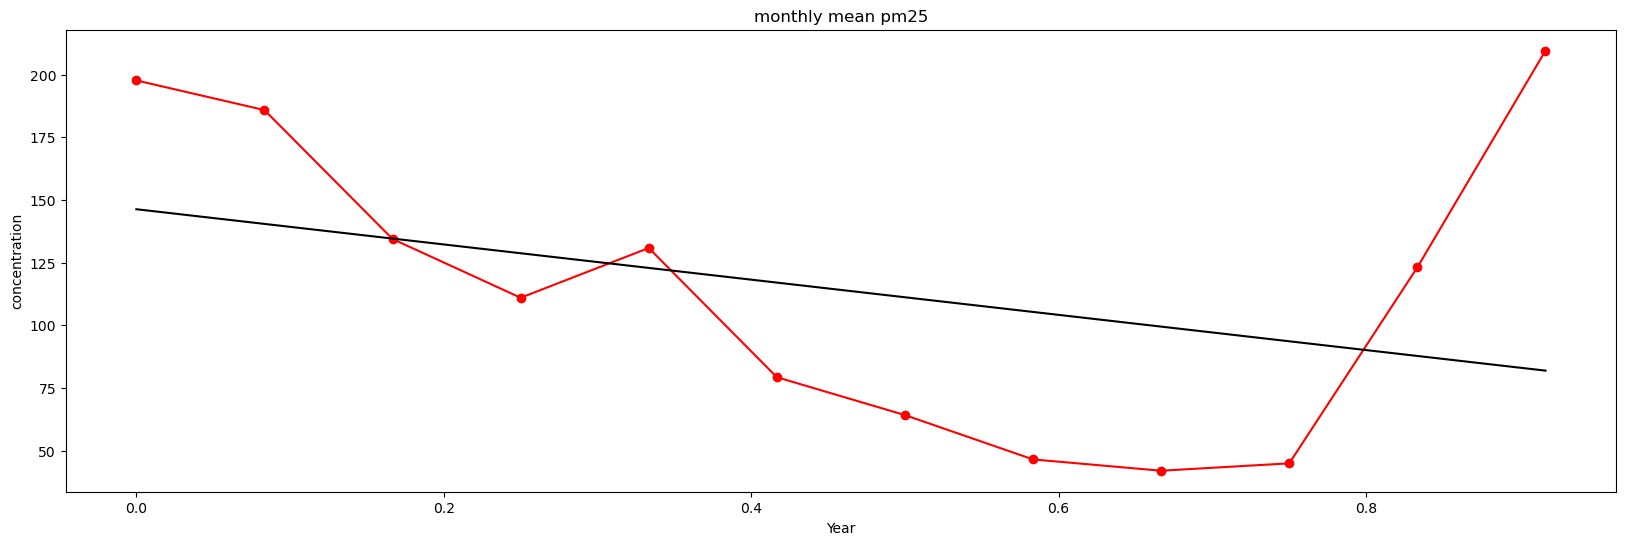

In [34]:
from vayu.smoothTrend import smoothTrend

pollutants = ['pm25']
for i, pollutant in enumerate(pollutants):
   
    smoothTrend(df1,pollutant, 1) 
    
    
#understand the logic
#remove these warnings
#savefig option

# ShapeFile

In [11]:
gdf_shape = (r'C:\Users\Harshit Jain\Desktop\delhiaq\Delhi\Districts.shp')
gdf_shape = gpd.read_file(gdf_shape)
print(gdf_shape)

   OBJECTID    DISTRICT                  STATE  \
0        99     Central  Nation Capital Region   
1       167        East  Nation Capital Region   
2       417  North East  Nation Capital Region   
3       413       North  Nation Capital Region   
4       420  North West  Nation Capital Region   
5       411   New Delhi  Nation Capital Region   
6       544       South  Nation Capital Region   
7       550  South West  Nation Capital Region   
8       613        West  Nation Capital Region   

                                            geometry  
0  POLYGON ((77.26042 28.62286, 77.25705 28.62268...  
1  POLYGON ((77.30482 28.57678, 77.29593 28.58194...  
2  POLYGON ((77.25066 28.66244, 77.25021 28.66266...  
3  POLYGON ((77.21434 28.78352, 77.21329 28.78031...  
4  POLYGON ((77.17093 28.66833, 77.16689 28.67303...  
5  POLYGON ((77.26042 28.62286, 77.26267 28.62114...  
6  POLYGON ((77.26455 28.60747, 77.26558 28.60738...  
7  POLYGON ((77.18253 28.64817, 77.18380 28.64638...  
8  P

# Plotting Railways and Industries

Your plots has also been saved


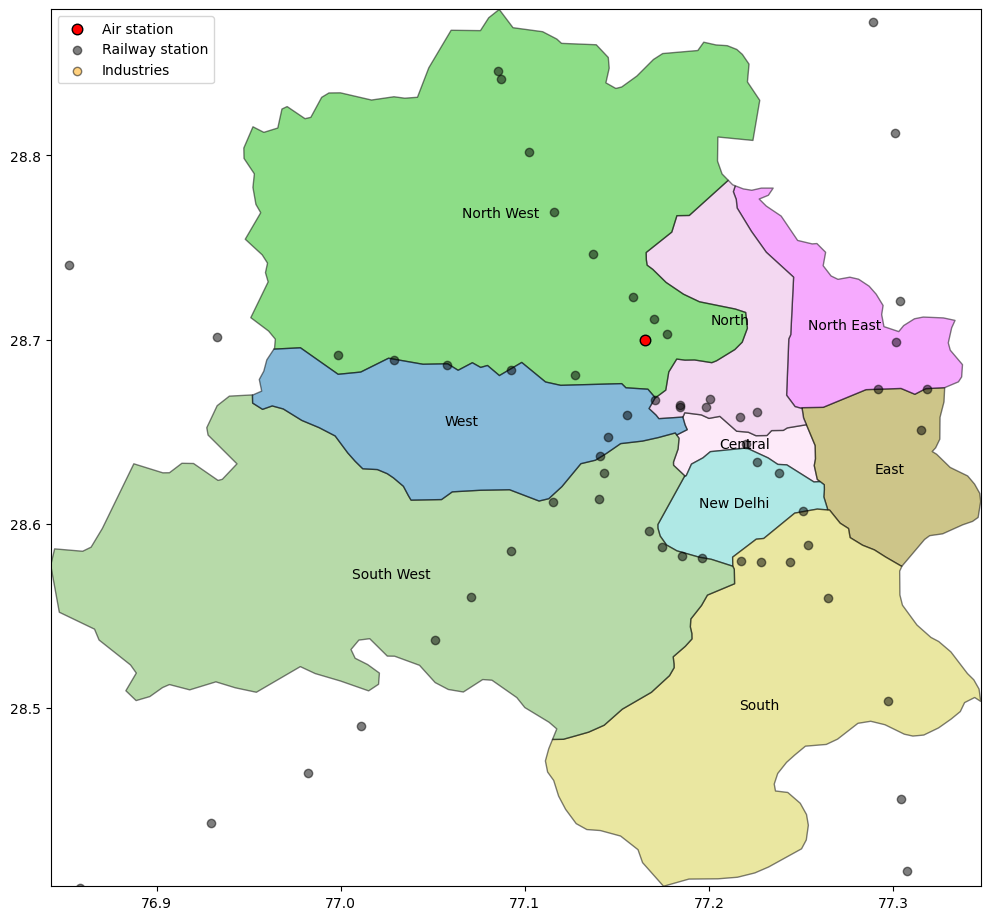

In [32]:
import random

def plot_industries(df,pollutant,shapedf,rail=True,ind=True, station=True, wd=True,savefig=False,markersize=0.1):
    
    
    unique=df[['station','latitude','longitude']].drop_duplicates()
    #print(unique)
    #print(len(unique))
    #type(unique)

    lat = unique['latitude']
    lon = unique['longitude']

    geometry = [Point(x, y) for x, y in zip(lon, lat)]
    stationgeo=gpd.GeoDataFrame(unique,geometry=geometry)


    fig, ax = plt.subplots(figsize=(12, 12))
    shapefile_extent = gdf_shape.total_bounds
    plt.xlim(shapefile_extent[0], shapefile_extent[2])
    plt.ylim(shapefile_extent[1], shapefile_extent[3])
    
    for idx, row in gdf_shape.iterrows():
        geom = row.geometry
        district_name = row["DISTRICT"]

        centroid = geom.centroid
        x, y = centroid.x, centroid.y

        ax.annotate(district_name, (x, y), ha="center", va="center")
        
    num_districts = len(gdf_shape)
    colors = []
    for _ in range(num_districts):
    # Generate random RGB values
        red = random.random()
        green = random.random()
        blue = random.random()
        color = (red, green, blue)
        colors.append(color)

    
    gdf_shape.plot(ax=ax,color=colors, edgecolor='black', facecolor='none', alpha=0.5)
    
    
    if station:
        stationgeo.plot(ax=ax, edgecolor='black', facecolor='red',markersize=markersize*df[pollutant],label='Air station')
    
    if rail:
        rail = pd.read_csv(r'C:\Users\Harshit Jain\Desktop\delhiaq\delhi wazirpur\output railwaystations.csv')
        rail = gpd.GeoDataFrame(rail, geometry=gpd.points_from_xy(rail.longitude, rail.latitude))
        rail.plot(ax=ax, edgecolor='black', facecolor='black',alpha=0.5,label='Railway station')

    if ind:
        coal = pd.read_csv(r'C:\Users\Harshit Jain\Desktop\delhiaq\delhi wazirpur\industries\coal.csv')
        coal = gpd.GeoDataFrame(coal, geometry=gpd.points_from_xy(coal.longitude, coal.latitude))

        diesel = pd.read_csv(r'C:\Users\Harshit Jain\Desktop\delhiaq\delhi wazirpur\industries\diesel.csv')
        diesel = gpd.GeoDataFrame(diesel, geometry=gpd.points_from_xy(diesel.longitude, diesel.latitude))

        steam = pd.read_csv(r'C:\Users\Harshit Jain\Desktop\delhiaq\delhi wazirpur\industries\steam.csv')
        steam = gpd.GeoDataFrame(steam, geometry=gpd.points_from_xy(steam.longitude, steam.latitude))

        biomass = pd.read_csv(r'C:\Users\Harshit Jain\Desktop\delhiaq\delhi wazirpur\industries\biomass.csv')
        biomass = gpd.GeoDataFrame(biomass, geometry=gpd.points_from_xy(biomass.longitude, biomass.latitude))

        biomass.plot(ax=ax, edgecolor='black', facecolor='orange',alpha=0.5)
        steam.plot(ax=ax, edgecolor='black', facecolor='orange',alpha=0.5)
        diesel.plot(ax=ax, edgecolor='black', facecolor='orange',alpha=0.5)
        coal.plot(ax=ax, edgecolor='black', facecolor='orange',alpha=0.5,label='Industries')
        
    if savefig:
        plt.savefig("Trendlevel.png", bbox_inches="tight")
        print("Your plots has also been saved")
    
    plt.legend()
    plt.show()
    
    
    
    
plot_industries(df,'pm25',gdf_shape,rail=True,ind=True, station=True, wd=True,savefig=True,markersize=0.2)

In [ ]:
PRIORITIES:
trendlevel
pollutionrose
calendarplot
Scatterplot
timeprop
timeplot

Improve: my interpolplot
Implement: my ideas

dont understand: smoothtrend, theilsen, linearrelation, polarfreq, fireplot